YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


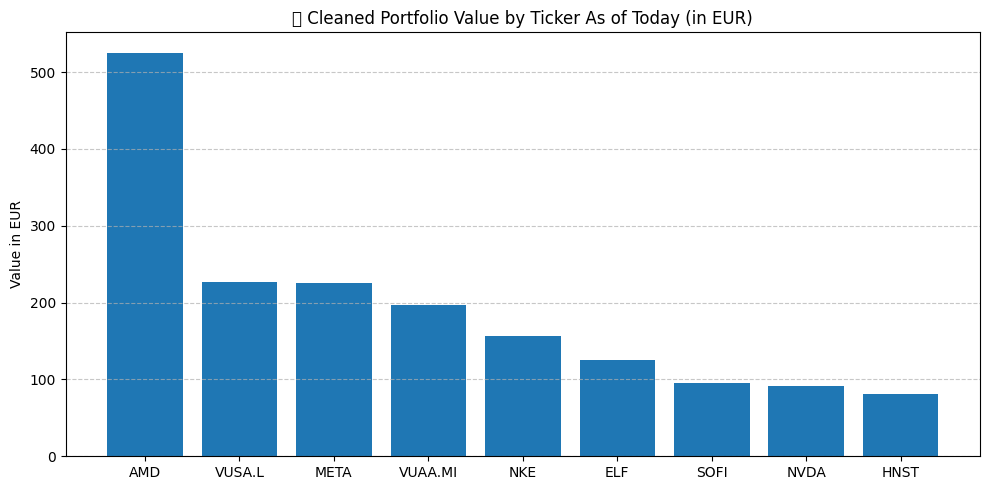

📊 Portfolio Breakdown in EUR:
            Shares  Price (EUR)  Value (EUR)
Ticker                                      
AMD       6.855999        76.65       525.50
VUSA.L    2.640232        86.04       227.17
META      0.477494       473.09       225.90
VUAA.MI   2.454687        80.07       196.54
NKE       3.063020        50.96       156.09
ELF       2.529204        49.38       124.88
SOFI     10.531650         9.04        95.16
NVDA      1.018318        89.48        91.12
HNST     20.419670         3.95        80.65

💼 Total Portfolio Value in EUR: 1723.0


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers and positions
tickers = ['AMD', 'META', 'VUAA.MI', 'VUSA.L', 'ELF', 'NKE', 'SOFI', 'HNST', 'NVDA']
positions = np.array([6.8559989, 0.4774942, 2.4546871, 2.6402322, 2.529204, 3.06302, 10.53165, 20.41967, 1.0183181])
positions_series = pd.Series(positions, index=tickers)

# Download latest closing prices
data = yf.download(tickers, period='5d', interval='1d')['Close']
latest_prices = data.ffill().iloc[-1].dropna()

# Align positions with available tickers
positions_series = positions_series[latest_prices.index]

# Download FX rates
eurusd = float(yf.download('EURUSD=X', period='5d')['Close'].ffill().iloc[-1])
gbpeur = float(yf.download('GBPEUR=X', period='5d')['Close'].ffill().iloc[-1])

# Convert prices to EUR
converted_prices = []
for ticker, price in latest_prices.items():
    if ticker.endswith('.L'):
        converted_prices.append(price * gbpeur)  # GBP to EUR
    else:
        converted_prices.append(price / eurusd)  # USD to EUR

converted_prices_series = pd.Series(converted_prices, index=latest_prices.index)

# Calculate EUR values
value_eur = positions_series * converted_prices_series
portfolio_value = value_eur.sum()

# Create summary table
summary_df = pd.DataFrame({
    'Shares': positions_series,
    'Price (EUR)': converted_prices_series.round(2),
    'Value (EUR)': value_eur.round(2)
})

# Sort by largest position
summary_df = summary_df.sort_values(by='Value (EUR)', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(summary_df.index, summary_df['Value (EUR)'])
plt.title("✅ Cleaned Portfolio Value by Ticker As of Today (in EUR)")
plt.ylabel("Value in EUR")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display summary
print("📊 Portfolio Breakdown in EUR:")
print(summary_df)
print("\n💼 Total Portfolio Value in EUR:", round(portfolio_value, 2))


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np 

tickers = ['AMD', 'META', 'VUAA.MI', 'VUSA.L', 'ELF', 'NKE', 'SOFI', 'HNST', 'NVDA']# You can add more tickers here
start_date = '2022-01-01'
end_date = '2024-12-31'

# Download the full data
data = yf.download(tickers, start=start_date, end=end_date)

# Check available keys (columns)
print("Available keys:", data.columns.levels[0])

# Try to get 'Adj Close'; fallback to 'Close' if unavailable
if 'Adj Close' in data.columns.levels[0]:
    yahoo_data = data['Adj Close']
elif 'Close' in data.columns.levels[0]:
    yahoo_data = data['Close']
else:
    raise ValueError("Neither 'Adj Close' nor 'Close' data is available.")

yahoo_data.dropna(inplace=True)
print("Yahoo Finance Data (cleaned):")
print(yahoo_data.tail())


[*********************100%***********************]  9 of 9 completed

Available keys: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Yahoo Finance Data (cleaned):
Ticker             AMD         ELF  HNST        META        NKE        NVDA  \
Date                                                                          
2024-12-19  118.879997  129.089996  6.58  595.040588  76.711731  130.667969   
2024-12-20  119.209999  128.660004  6.89  584.729797  76.552544  134.687607   
2024-12-23  124.599998  128.949997  6.68  599.316772  76.373451  139.657150   
2024-12-27  125.190002  127.760002  6.93  599.276855  76.035156  136.997391   
2024-12-30  122.440002  127.110001  6.90  590.714417  74.274071  137.477356   

Ticker       SOFI     VUAA.MI     VUSA.L  
Date                                      
2024-12-19  15.03  108.250000  88.941544  
2024-12-20  15.35  108.629997  89.422615  
2024-12-23  15.63  108.559998  89.537270  
2024-12-27  15.98  108.870003  89.609558  
2024-12-30  15.63  108.230003  89.133476  


In [6]:
returns = np.log(yahoo_data / yahoo_data.shift(1)).dropna()



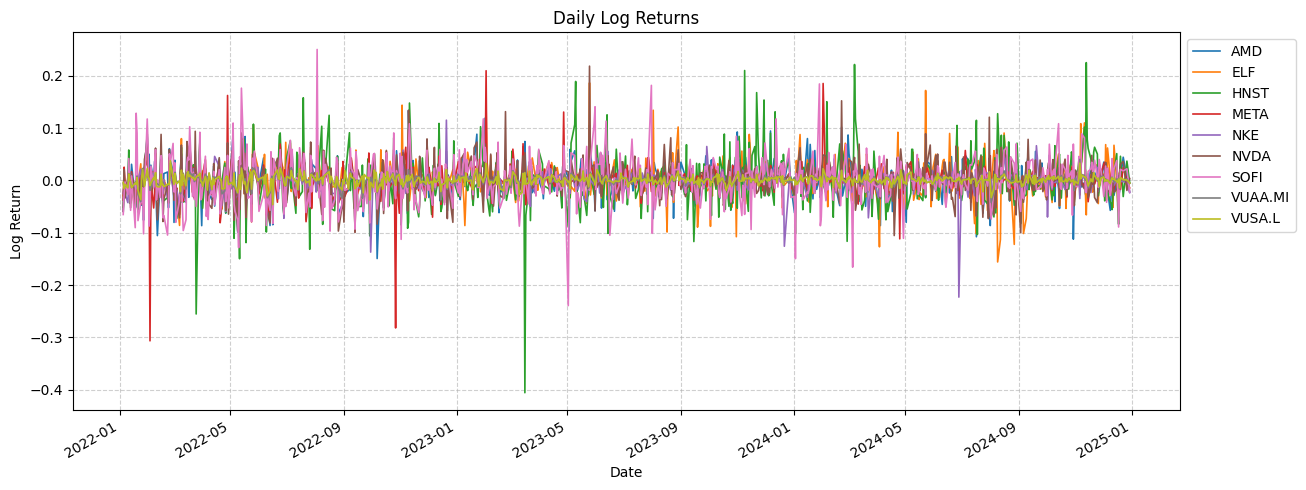

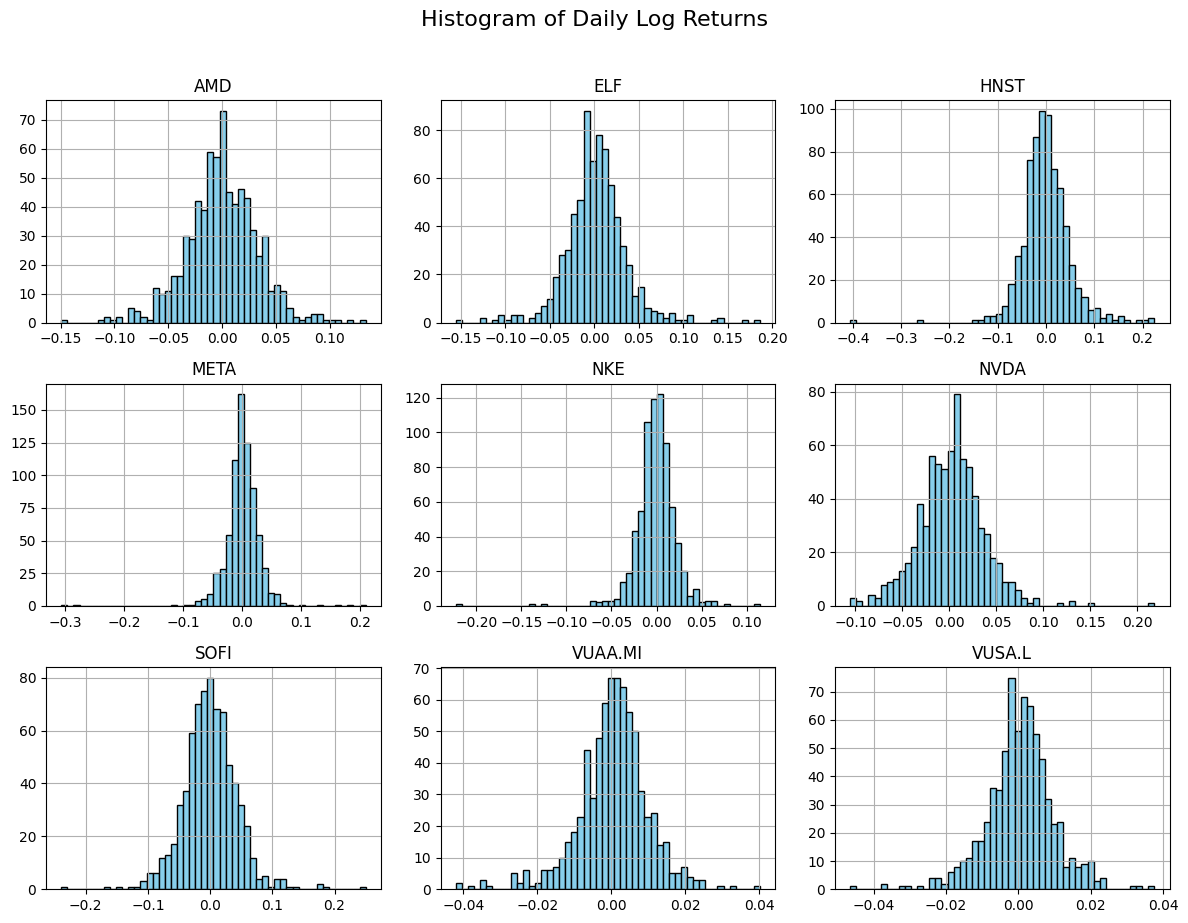

Standard deviations (volatility) of daily log returns:
Ticker
HNST       0.049034
SOFI       0.043830
NVDA       0.034767
ELF        0.033999
AMD        0.033458
META       0.031597
NKE        0.022181
VUAA.MI    0.009490
VUSA.L     0.009247
dtype: float64


In [7]:
import matplotlib.pyplot as plt

# 1. 📈 Line Chart: Daily Log Returns
plt.figure(figsize=(12, 5))
returns.plot(ax=plt.gca(), linewidth=1.2)
plt.title("Daily Log Returns")
plt.ylabel("Log Return")
plt.xlabel("Date")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Push legend outside
plt.show()

# 2. 📊 Histogram Chart: Distribution of Each Asset's Daily Log Returns
num_assets = returns.shape[1]
cols = 3
rows = (num_assets + cols - 1) // cols  # auto row count

returns.hist(
    bins=50,
    figsize=(4 * cols, 3 * rows),
    layout=(rows, cols),
    edgecolor='black',
    color='skyblue'
)

plt.suptitle("Histogram of Daily Log Returns", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 3. 📉 Print Volatilities
print("Standard deviations (volatility) of daily log returns:")
print(returns.std().sort_values(ascending=False))


In [8]:
cov_matrix = returns.cov()
print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
Ticker        AMD       ELF      HNST      META       NKE      NVDA      SOFI  \
Ticker                                                                          
AMD      0.001119  0.000368  0.000322  0.000512  0.000263  0.000859  0.000552   
ELF      0.000368  0.001156  0.000323  0.000323  0.000194  0.000459  0.000392   
HNST     0.000322  0.000323  0.002404  0.000380  0.000309  0.000388  0.000808   
META     0.000512  0.000323  0.000380  0.000998  0.000240  0.000546  0.000519   
NKE      0.000263  0.000194  0.000309  0.000240  0.000492  0.000269  0.000331   
NVDA     0.000859  0.000459  0.000388  0.000546  0.000269  0.001209  0.000537   
SOFI     0.000552  0.000392  0.000808  0.000519  0.000331  0.000537  0.001921   
VUAA.MI  0.000120  0.000066  0.000093  0.000110  0.000057  0.000139  0.000136   
VUSA.L   0.000119  0.000069  0.000089  0.000104  0.000057  0.000133  0.000134   

Ticker    VUAA.MI    VUSA.L  
Ticker                       
AMD      0.000120  0.000119  

In [9]:
# Step 1: Match tickers to positions
positions = np.array([6.8559889, 0.4774942, 2.4546871, 2.640232, 2.529204, 3.063002, 10.53165, 20.41967, 1.0183108])  # Units: AAPL, MSFT, ^GSPC

# Step 2: Get latest prices from data
latest_prices = yahoo_data.iloc[-1]  # Last available date

# Step 3: Calculate notional positions
notional_positions = latest_prices.values * positions  # Element-wise multiplication

# Step 4: Portfolio value and weights in €
portfolio_value = notional_positions.sum()
weights = notional_positions / portfolio_value


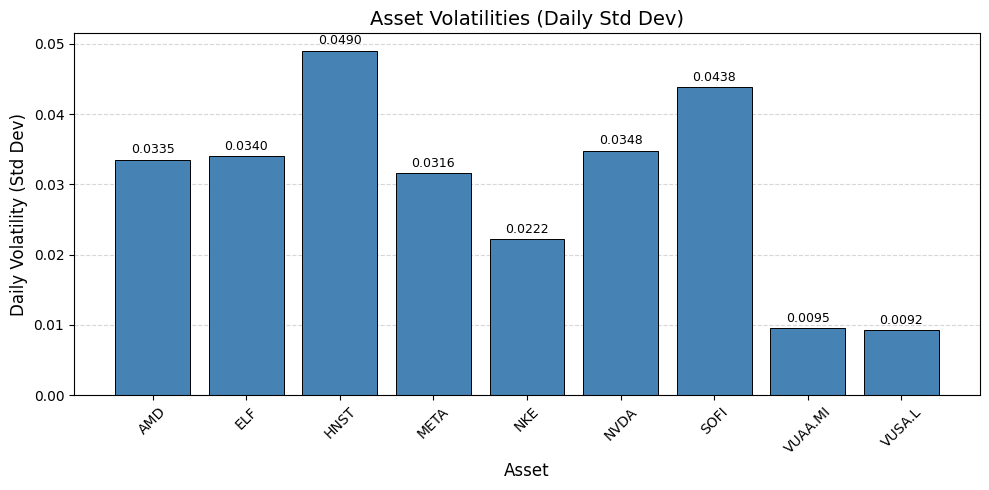

In [10]:
import matplotlib.pyplot as plt

# Compute daily standard deviations (volatilities)
asset_vols = returns.std()

# Create bar chart with enhancements
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(asset_vols.index, asset_vols.values, color='steelblue', edgecolor='black', linewidth=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.0005,
        f'{yval:.4f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Improve readability
ax.set_title('Asset Volatilities (Daily Std Dev)', fontsize=14)
ax.set_ylabel('Daily Volatility (Std Dev)', fontsize=12)
ax.set_xlabel('Asset', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



In [11]:
# Portfolio returns (from earlier)
portfolio_returns = returns @ weights

# CVaR function
def compute_cvar(returns, alpha=0.95):
    var = np.percentile(returns, (1 - alpha) * 100)
    cvar = returns[returns <= var].mean()
    return var, cvar

for alpha in [0.95, 0.99]:
    var, cvar = compute_cvar(portfolio_returns, alpha)

    # Scale to € terms
    var_eur = abs(var * portfolio_value)
    cvar_eur = abs(cvar * portfolio_value)

    # Print both % and €
    print(f"{int(alpha*100)}% VaR:  {abs(var):.4%}  →  €{var_eur:,.2f}")
    print(f"{int(alpha*100)}% CVaR: {abs(cvar):.4%}  →  €{cvar_eur:,.2f}")
    print("—" * 40)





95% VaR:  2.7346%  →  €151.80
95% CVaR: 3.9947%  →  €221.75
————————————————————————————————————————
99% VaR:  4.5063%  →  €250.14
99% CVaR: 6.1375%  →  €340.70
————————————————————————————————————————


In [12]:

def check_var_cvar_exceedances(portfolio_returns, portfolio_value, window=20):
    results = {}

    for alpha, label in zip([0.95, 0.99], ["95%", "99%"]):
        z_score = abs(np.round(np.percentile(np.random.normal(0, 1, 10**6), (1 - alpha) * 100), 3))

        # Rolling volatility and thresholds
        rolling_vol = portfolio_returns.rolling(window).std()
        rolling_var = -z_score * rolling_vol
        rolling_cvar = portfolio_returns.rolling(window).apply(
            lambda x: x[x < x.quantile(1 - alpha)].mean(), raw=False
        )

        # Merge data
        df = pd.DataFrame({
            'Actual': portfolio_returns,
            'VaR': rolling_var,
            'CVaR': rolling_cvar
        }).dropna()

        # Exceedances
        var_exceed = df['Actual'] < df['VaR']
        cvar_exceed = df['Actual'] < df['CVaR']

        # Accuracy metrics
        var_count = var_exceed.sum()
        cvar_count = cvar_exceed.sum()
        n_obs = len(df)
        expected_exceeds = int((1 - alpha) * n_obs)
        failure_rate = var_count / n_obs
        accuracy_rate = 1 - failure_rate

        results[label] = {
            "Data": df,
            "VaR Exceed Count": int(var_count),
            "CVaR Exceed Count": int(cvar_count),
            "Expected VaR Exceeds": expected_exceeds,
            "Failure Rate (%)": round(100 * failure_rate, 2),
            "Accuracy (%)": round(100 * accuracy_rate, 2)
        }

        # 📈 VaR Exceedance Plot
        fig, ax = plt.subplots(figsize=(14, 5))
        ax.plot(df.index, df['Actual'], label='Actual Return', color='blue', linewidth=1.5)
        ax.plot(df.index, df['VaR'], label=f'VaR {label}', linestyle='--', color='red', linewidth=2)
        ax.scatter(df.index[var_exceed], df['Actual'][var_exceed],
                   color='red', label='VaR Exceeded', marker='x', s=80)

        ax.set_title(f"VaR Exceedances – {label} Confidence Level", fontsize=15)
        ax.set_ylabel("Portfolio Daily Return", fontsize=12)
        ax.set_xlabel("Date", fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
        plt.tight_layout()
        plt.show()

    # 📊 Summary Chart: VaR Robustness (Accuracy %)
    conf_levels = sorted(results.keys())
    accuracies = [results[cl]["Accuracy (%)"] for cl in conf_levels]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(conf_levels, accuracies, color='seagreen')
    plt.ylim(0, 110)
    plt.title("VaR Model Robustness (Accuracy %)")
    plt.ylabel("Accuracy (%)")
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{acc:.1f}%',
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    print("✅ VaR robustness summary chart generated.")
    return results


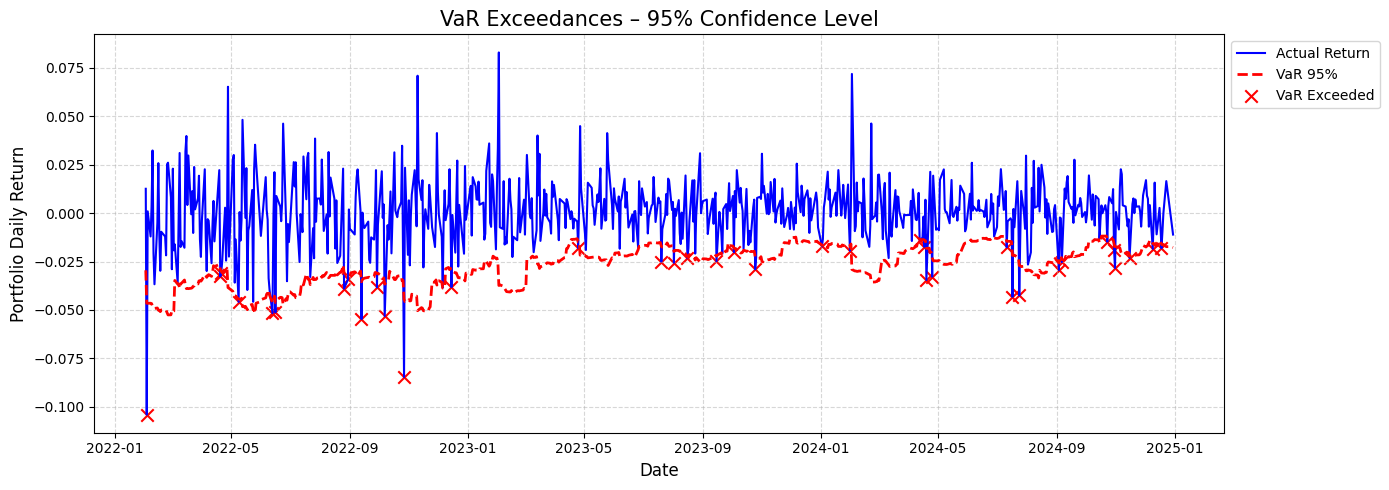

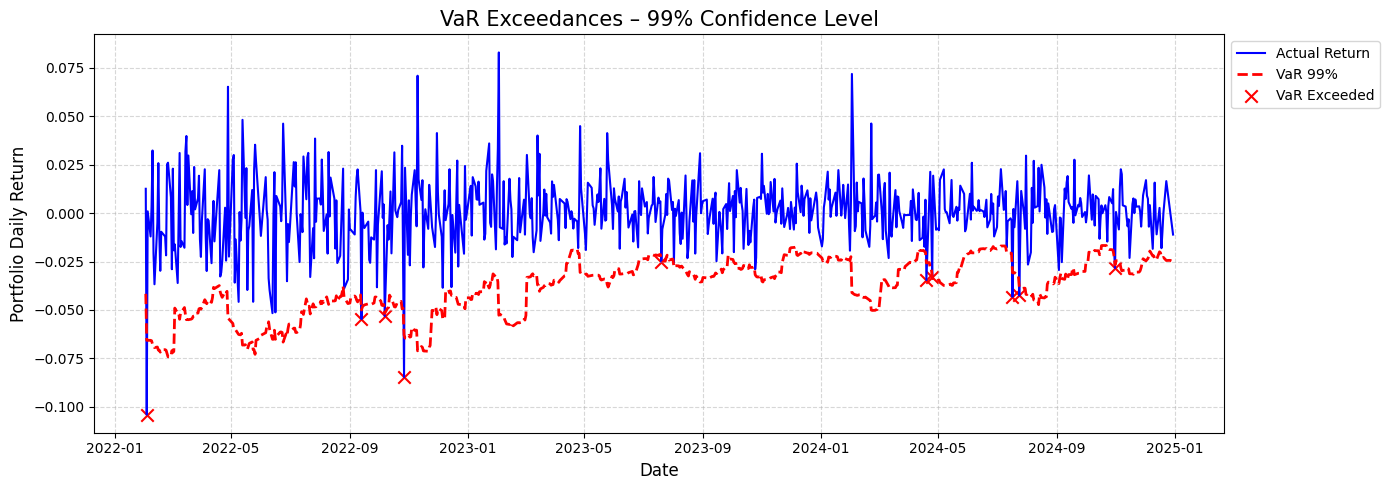

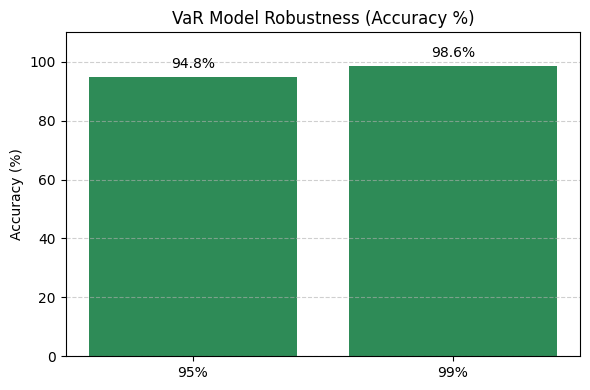

✅ VaR robustness summary chart generated.
{'95%': {'Accuracy (%)': 94.79,
         'CVaR Exceed Count': 0,
         'Expected VaR Exceeds': 35,
         'Failure Rate (%)': 5.21,
         'VaR Exceed Count': 37},
 '99%': {'Accuracy (%)': 98.59,
         'CVaR Exceed Count': 0,
         'Expected VaR Exceeds': 7,
         'Failure Rate (%)': 1.41,
         'VaR Exceed Count': 10}}


,Accuracy (%),Failure Rate (%)
95%,94.79,5.21
99%,98.59,1.41


In [13]:
results = check_var_cvar_exceedances(portfolio_returns, portfolio_value)

import pprint
pprint.pprint({
    k: {i: v for i, v in val.items() if i != 'Data'}
    for k, val in results.items()
})

pd.DataFrame({
    k: {
        "Accuracy (%)": v["Accuracy (%)"],
        "Failure Rate (%)": v["Failure Rate (%)"]
    }
    for k, v in results.items()
}).T


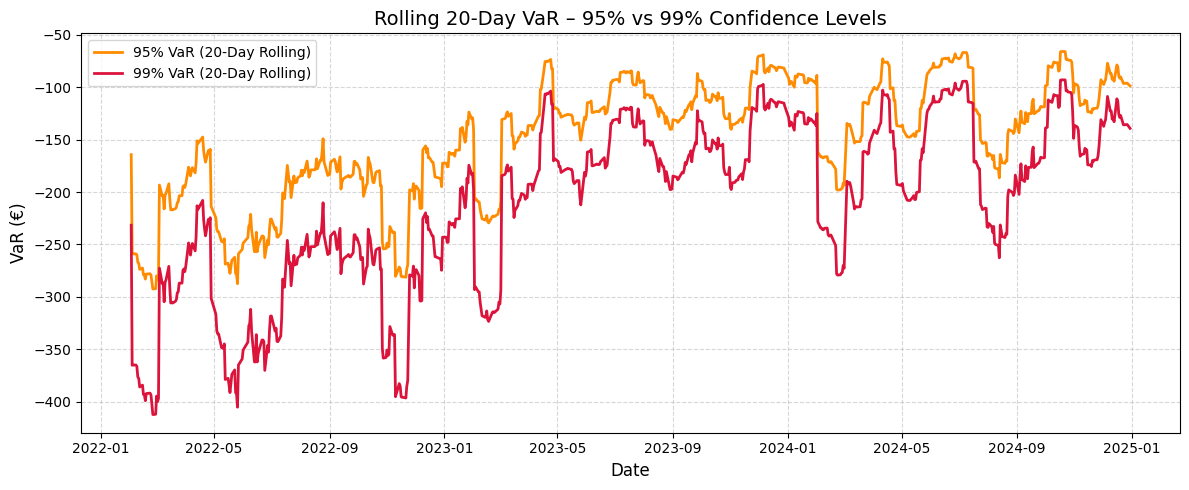

In [14]:
import matplotlib.pyplot as plt

# Predefined z-scores for normal distribution
z_scores = {'95%': 1.65, '99%': 2.326}
colors = {'95%': 'darkorange', '99%': 'crimson'}

plt.figure(figsize=(12, 5))

for label in ['95%', '99%']:
    z = z_scores[label]

    # Rolling 20-day standard deviation
    rolling_vol = portfolio_returns.rolling(20).std()

    # Rolling VaR in monetary (€) terms
    rolling_var = -z * rolling_vol * portfolio_value

    # Plot each VaR line
    plt.plot(rolling_var, label=f'{label} VaR (20-Day Rolling)', color=colors[label], linewidth=2)

# Chart formatting
plt.title("Rolling 20-Day VaR – 95% vs 99% Confidence Levels", fontsize=14)
plt.ylabel("VaR (€)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


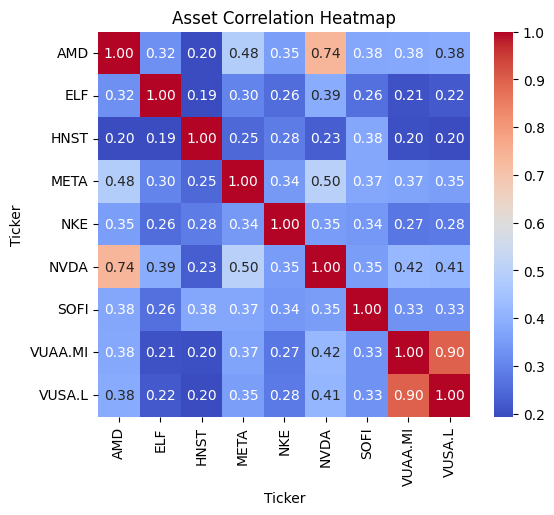

In [15]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Asset Correlation Heatmap")
plt.show()


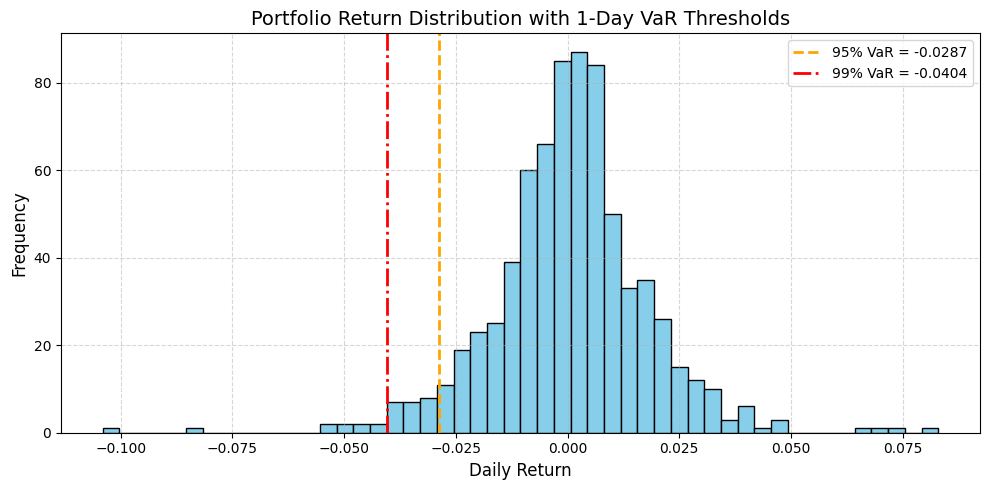

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Compute portfolio volatility
portfolio_std = portfolio_returns.std()

# Z-scores for 95% and 99% confidence levels
z_scores = {'95%': 1.65, '99%': 2.326}
VaR_1d_95 = -z_scores['95%'] * portfolio_std
VaR_1d_99 = -z_scores['99%'] * portfolio_std

# Plot histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=50, color='skyblue', edgecolor='black')

# Add VaR threshold lines
plt.axvline(VaR_1d_95, color='orange', linestyle='--', linewidth=2,
            label=f"95% VaR = {VaR_1d_95:.4f}")
plt.axvline(VaR_1d_99, color='red', linestyle='-.', linewidth=2,
            label=f"99% VaR = {VaR_1d_99:.4f}")

# Labels and legend
plt.title("Portfolio Return Distribution with 1-Day VaR Thresholds", fontsize=14)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pprint
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

import logging
logging.getLogger("yfinance").setLevel(logging.CRITICAL)  # Silence yfinance logs


def historical_stress_test(tickers, weights, start_date, end_date, label="March 2020 COVID Crash", benchmark_tickers=None):
    # 1. Download data for portfolio
    raw_data = yf.download(tickers, start=start_date, end=end_date)['Close']

    # 2. Drop missing tickers
    valid_data = raw_data.dropna(axis=1, how='any')
    available = valid_data.columns.tolist()
    missing = [t for t in tickers if t not in available]

    if len(available) == 0:
        print("🚫 No assets have valid price data in the given window. Cannot compute stress test.")
        return None

    if missing:
        print(f"ℹ️ Missing tickers (excluded from stress test): {missing}")


    # 3. Align weights
    filtered_indices = [tickers.index(t) for t in available]
    filtered_weights = np.array(weights)[filtered_indices]
    filtered_weights = filtered_weights / filtered_weights.sum()

    # 4. Compute portfolio returns
    returns = np.log(valid_data / valid_data.shift(1)).dropna()
    portfolio_returns = returns @ filtered_weights
    cumulative_returns = (1 + portfolio_returns).cumprod()

    # 5. Download and compute benchmark returns if provided
    benchmark_returns_dict = {}
    benchmark_cumulative_dict = {}
    if benchmark_tickers:
        for bmark in benchmark_tickers:
            try:
                benchmark_prices = yf.download(bmark, start=start_date, end=end_date)['Close'].dropna()
                benchmark_returns = np.log(benchmark_prices / benchmark_prices.shift(1)).dropna()

                # Align with portfolio
                aligned = pd.concat([portfolio_returns, benchmark_returns], axis=1).dropna()
                aligned.columns = ['Portfolio', bmark]

                portfolio_returns = aligned['Portfolio']
                benchmark_returns = aligned[bmark]
                benchmark_cumulative = (1 + benchmark_returns).cumprod()

                benchmark_returns_dict[bmark] = benchmark_returns
                benchmark_cumulative_dict[bmark] = benchmark_cumulative
            except Exception as e:
                print(f"⚠️ Could not download or align benchmark {bmark}: {e}")

    # 6. Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(cumulative_returns, label='Portfolio Cumulative Return', color='crimson', linewidth=2)

    for bmark, bmark_cum in benchmark_cumulative_dict.items():
        ax.plot(bmark_cum, label=f'{bmark} Cumulative Return', linestyle='--', linewidth=2)

    ax.set_title(f"📉 Historical Stress Test: {label}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Return")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

    # Improve x-axis date visibility
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # 7. Summary
    summary = {
        "Scenario": label,
        "Tickers Used": available,
        "Start Value": 1.0,
        "End Value": round(cumulative_returns.iloc[-1], 4),
        "Total Return (%)": round((cumulative_returns.iloc[-1] - 1) * 100, 2),
        "Max Drawdown (%)": round(((cumulative_returns.cummax() - cumulative_returns).max()) * 100, 2),
        "Volatility (Daily Std Dev)": round(portfolio_returns.std(), 4)
    }

    for bmark, bmark_ret in benchmark_returns_dict.items():
        bmark_cum = benchmark_cumulative_dict[bmark]
        summary[f"{bmark} Benchmark Return (%)"] = round((bmark_cum.iloc[-1] - 1) * 100, 2)
        tracking_error = np.sqrt(np.mean((portfolio_returns - bmark_ret) ** 2))
        correlation = np.corrcoef(portfolio_returns, bmark_ret)[0, 1]
        summary[f"{bmark} Tracking Error"] = round(tracking_error, 4)
        summary[f"{bmark} Correlation"] = round(correlation, 4)

    print("\n📊 Stress Test Summary:")
    pprint.pprint(summary)

    return summary


[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ℹ️ Missing tickers (excluded from stress test): ['SOFI', 'HNST']


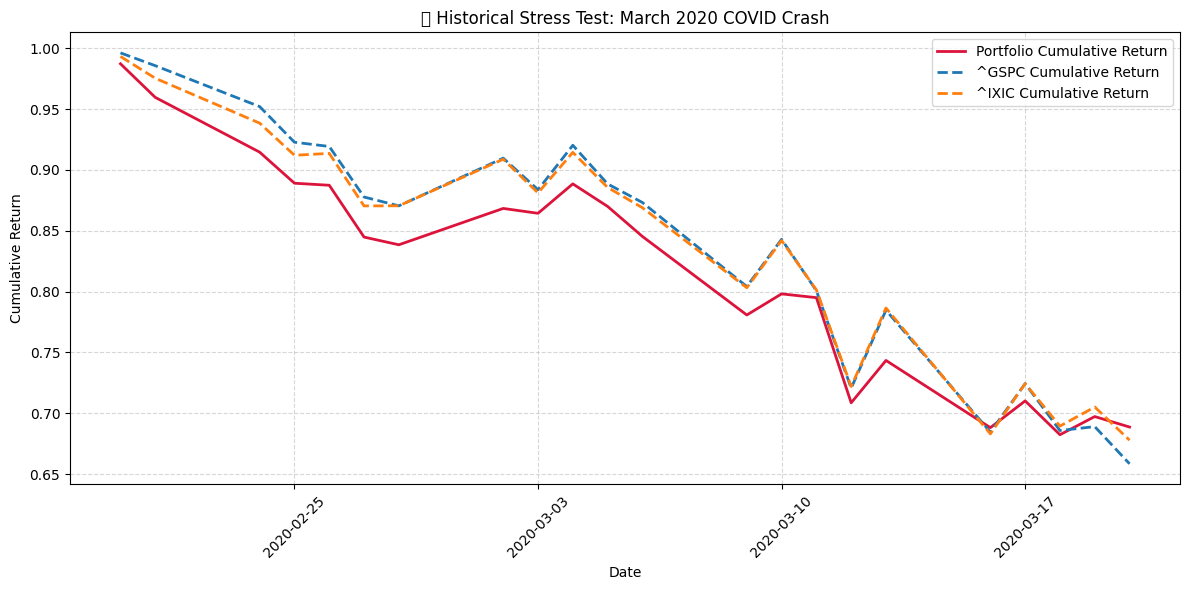


📊 Stress Test Summary:
{'End Value': 0.6888,
 'Max Drawdown (%)': 30.48,
 'Scenario': 'March 2020 COVID Crash',
 'Start Value': 1.0,
 'Tickers Used': ['AMD', 'ELF', 'META', 'NKE', 'NVDA', 'VUAA.MI', 'VUSA.L'],
 'Total Return (%)': -31.12,
 'Volatility (Daily Std Dev)': 0.0398,
 '^GSPC Benchmark Return (%)': -34.14,
 '^GSPC Correlation': 0.9085,
 '^GSPC Tracking Error': 0.0226,
 '^IXIC Benchmark Return (%)': -32.21,
 '^IXIC Correlation': 0.9198,
 '^IXIC Tracking Error': 0.0219}


In [18]:
summary = historical_stress_test(tickers, weights, start_date='2020-02-19', end_date='2020-03-23', benchmark_tickers=['^GSPC', '^IXIC'])



In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pprint
import warnings
import logging

warnings.filterwarnings("ignore")
logging.getLogger("yfinance").setLevel(logging.CRITICAL)

def historical_stress_test(tickers, weights, start_date, end_date, label="March 2020 COVID Crash", benchmark_tickers=None):
    # 1. Download data for portfolio
    raw_data = yf.download(tickers, start=start_date, end=end_date)['Close']

    # 2. Drop missing tickers
    valid_data = raw_data.dropna(axis=1, how='any')
    available = valid_data.columns.tolist()
    missing = [t for t in tickers if t not in available]

    if len(available) == 0:
        print("🚫 No assets have valid price data in the given window. Cannot compute stress test.")
        return None

    if missing:
        print(f"ℹ️ Missing tickers (excluded from stress test): {missing}")

    # 3. Align weights
    filtered_indices = [tickers.index(t) for t in available]
    filtered_weights = np.array(weights)[filtered_indices]
    filtered_weights = filtered_weights / filtered_weights.sum()

    # 4. Compute portfolio returns
    returns = np.log(valid_data / valid_data.shift(1)).dropna()
    portfolio_returns = returns @ filtered_weights
    cumulative_returns = (1 + portfolio_returns).cumprod()

    # 5. Download and compute benchmark returns if provided
    benchmark_returns_dict = {}
    benchmark_cumulative_dict = {}
    if benchmark_tickers:
        for bmark in benchmark_tickers:
            try:
                benchmark_prices = yf.download(bmark, start=start_date, end=end_date)['Close'].dropna()
                benchmark_returns = np.log(benchmark_prices / benchmark_prices.shift(1)).dropna()

                # Align with portfolio
                aligned = pd.concat([portfolio_returns, benchmark_returns], axis=1).dropna()
                aligned.columns = ['Portfolio', bmark]

                portfolio_returns = aligned['Portfolio']
                benchmark_returns = aligned[bmark]
                benchmark_cumulative = (1 + benchmark_returns).cumprod()

                benchmark_returns_dict[bmark] = benchmark_returns
                benchmark_cumulative_dict[bmark] = benchmark_cumulative
            except Exception as e:
                print(f"⚠️ Could not download or align benchmark {bmark}: {e}")

    # 6. Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(cumulative_returns, label='Portfolio Cumulative Return', color='crimson', linewidth=2)

    for bmark, bmark_cum in benchmark_cumulative_dict.items():
        ax.plot(bmark_cum, label=f'{bmark} Cumulative Return', linestyle='--', linewidth=2)

    ax.set_title(f"📉 Historical Stress Test: {label}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Return")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

    # Improve x-axis date visibility
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # 7. Summary
    summary = {
        "Scenario": label,
        "Tickers Used": available,
        "Start Value": 1.0,
        "End Value": round(cumulative_returns.iloc[-1], 4),
        "Total Return (%)": round((cumulative_returns.iloc[-1] - 1) * 100, 2),
        "Max Drawdown (%)": round(((cumulative_returns.cummax() - cumulative_returns).max()) * 100, 2),
        "Volatility (Daily Std Dev)": round(portfolio_returns.std(), 4)
    }

    for bmark, bmark_ret in benchmark_returns_dict.items():
        bmark_cum = benchmark_cumulative_dict[bmark]
        summary[f"{bmark} Benchmark Return (%)"] = round((bmark_cum.iloc[-1] - 1) * 100, 2)
        tracking_error = np.sqrt(np.mean((portfolio_returns - bmark_ret) ** 2))
        correlation = np.corrcoef(portfolio_returns, bmark_ret)[0, 1]
        summary[f"{bmark} Tracking Error"] = round(tracking_error, 4)
        summary[f"{bmark} Correlation"] = round(correlation, 4)

    print("\n📊 Stress Test Summary:")
    pprint.pprint(summary)

    return summary

# Example for 2008 Global Financial Crisis
# historical_stress_test(tickers, weights, start_date='2008-09-01', end_date='2009-03-01', label="2008 Global Financial Crisis", benchmark_tickers=['^GSPC', '^IXIC'])


[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ℹ️ Missing tickers (excluded from stress test): ['META', 'VUAA.MI', 'VUSA.L', 'ELF', 'SOFI', 'HNST']


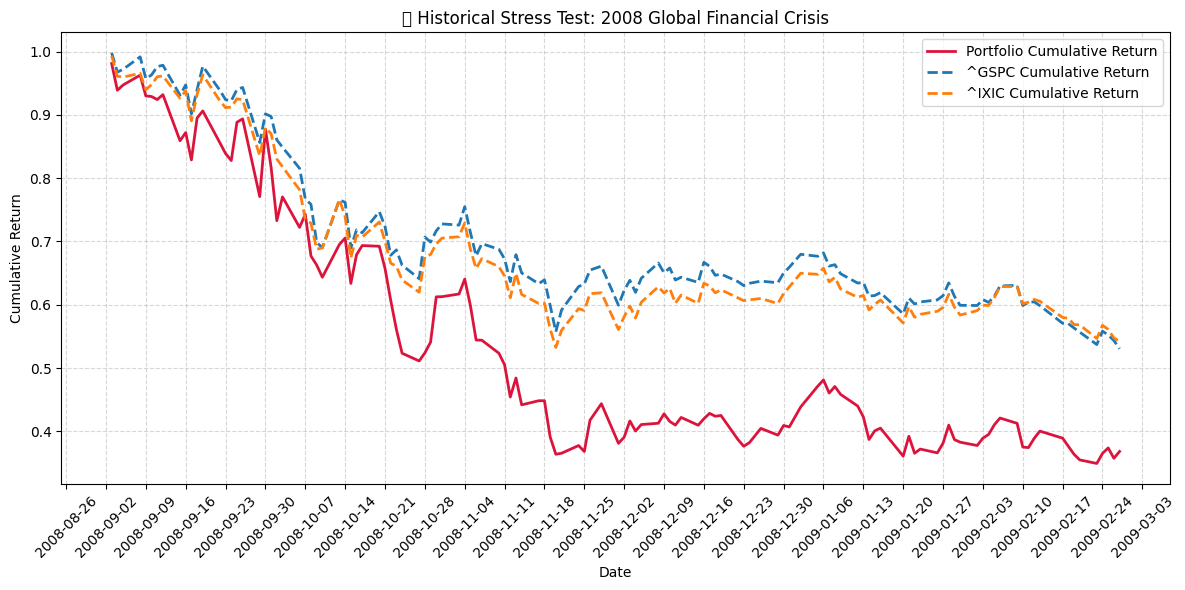


📊 Stress Test Summary:
{'End Value': 0.3681,
 'Max Drawdown (%)': 63.19,
 'Scenario': '2008 Global Financial Crisis',
 'Start Value': 1.0,
 'Tickers Used': ['AMD', 'NKE', 'NVDA'],
 'Total Return (%)': -63.19,
 'Volatility (Daily Std Dev)': 0.0551,
 '^GSPC Benchmark Return (%)': -46.95,
 '^GSPC Correlation': 0.7306,
 '^GSPC Tracking Error': 0.0378,
 '^IXIC Benchmark Return (%)': -45.79,
 '^IXIC Correlation': 0.7685,
 '^IXIC Tracking Error': 0.0358}


In [20]:
summary = historical_stress_test(
    tickers, 
    weights, 
    start_date='2008-09-01', 
    end_date='2009-03-01', 
    label="2008 Global Financial Crisis", 
    benchmark_tickers=['^GSPC', '^IXIC']
)


In [21]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings("ignore")

def compute_beta(asset_ret, market_ret):
    cov = np.cov(asset_ret, market_ret)[0, 1]
    market_var = np.var(market_ret)
    return cov / market_var if market_var != 0 else 0

def hypothetical_stress_test_sp500_shock(tickers, weights, shock_pct=0.10, label="S&P 500 +10%", benchmark_tickers=None):
    end = datetime.today()
    start = end - timedelta(days=365)

    data = yf.download(tickers + ['^GSPC'], start=start, end=end)['Close'].dropna()
    returns = np.log(data / data.shift(1)).dropna()

    if '^GSPC' not in returns.columns:
        print("❌ Could not compute returns vs. S&P 500.")
        return

    market_ret = returns['^GSPC']
    asset_betas = []
    valid_tickers = []

    for ticker in tickers:
        if ticker in returns.columns:
            asset_ret = returns[ticker]
            aligned = pd.concat([asset_ret, market_ret], axis=1).dropna()
            beta = compute_beta(aligned[ticker], aligned['^GSPC'])
            asset_betas.append(beta)
            valid_tickers.append(ticker)

    if not valid_tickers:
        print("❌ No valid tickers for beta calculation.")
        return

    weights = np.array(weights)
    weight_map = dict(zip(tickers, weights))
    filtered_weights = np.array([weight_map[t] for t in valid_tickers])
    filtered_weights = filtered_weights / filtered_weights.sum()

    portfolio_beta = np.sum(filtered_weights * np.array(asset_betas))
    portfolio_return = shock_pct * portfolio_beta
    portfolio_cumulative = pd.Series([1.0, 1.0 + portfolio_return],
                                     index=pd.date_range(end - timedelta(days=1), periods=2))

    benchmark_returns_dict = {}
    benchmark_cumulative_dict = {}

    if benchmark_tickers:
        for b in benchmark_tickers:
            try:
                b_prices = yf.download(b, start=start, end=end)['Close'].dropna()
                b_returns = np.log(b_prices / b_prices.shift(1)).dropna()
                aligned = pd.concat([b_returns, market_ret], axis=1).dropna()
                beta = compute_beta(aligned.iloc[:, 0], aligned.iloc[:, 1])
                b_simulated_return = beta * shock_pct
                benchmark_returns_dict[b] = pd.Series([0, b_simulated_return],
                                                      index=portfolio_cumulative.index)
                benchmark_cumulative_dict[b] = pd.Series([1.0, 1.0 + b_simulated_return],
                                                         index=portfolio_cumulative.index)
            except Exception as e:
                print(f"⚠️ Benchmark {b} failed: {e}")

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(portfolio_cumulative, label='Portfolio Simulated Return', color='crimson', linewidth=2)

    for bmark, bmark_cum in benchmark_cumulative_dict.items():
        ax.plot(bmark_cum, label=f'{bmark} Simulated Return', linestyle='--')

    ax.set_title(f"📉 Hypothetical Stress Test: {label}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Return")
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Summary
    print("\n📊 Hypothetical Stress Test Summary")
    print("Scenario".ljust(30), ":", label)
    print("Portfolio Return (%)".ljust(30), ":", round(portfolio_return * 100, 2))
    print("Tickers Used".ljust(30), ":", ", ".join(valid_tickers))

    for bmark, bret in benchmark_returns_dict.items():
        sim_return = round((benchmark_cumulative_dict[bmark].iloc[-1] - 1) * 100, 2)
        tracking_error = np.sqrt(np.mean((bret - portfolio_return) ** 2))
        print(f"{bmark} Simulated Return (%)".ljust(30), ":", sim_return)
        print(f"{bmark} Tracking Error".ljust(30), ":", round(tracking_error, 4))

    return {
        "Scenario": label,
        "Tickers Used": valid_tickers,
        "Portfolio Simulated Return (%)": round(portfolio_return * 100, 2)
    }


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


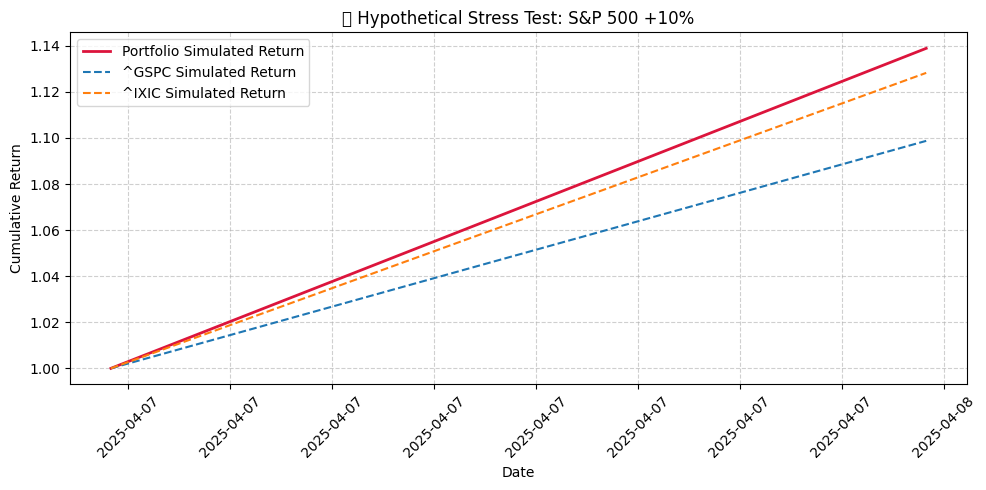


📊 Hypothetical Stress Test Summary
Scenario                       : S&P 500 +10%
Portfolio Return (%)           : 13.89
Tickers Used                   : AMD, META, VUAA.MI, VUSA.L, ELF, NKE, SOFI, HNST, NVDA
^GSPC Simulated Return (%)     : 9.88
^GSPC Tracking Error           : 0.1023
^IXIC Simulated Return (%)     : 12.83
^IXIC Tracking Error           : 0.0985


In [22]:
summary = hypothetical_stress_test_sp500_shock(
    tickers,
    weights,
    shock_pct=0.10,
    label="S&P 500 +10%",
    benchmark_tickers=["^GSPC", "^IXIC"]
)


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


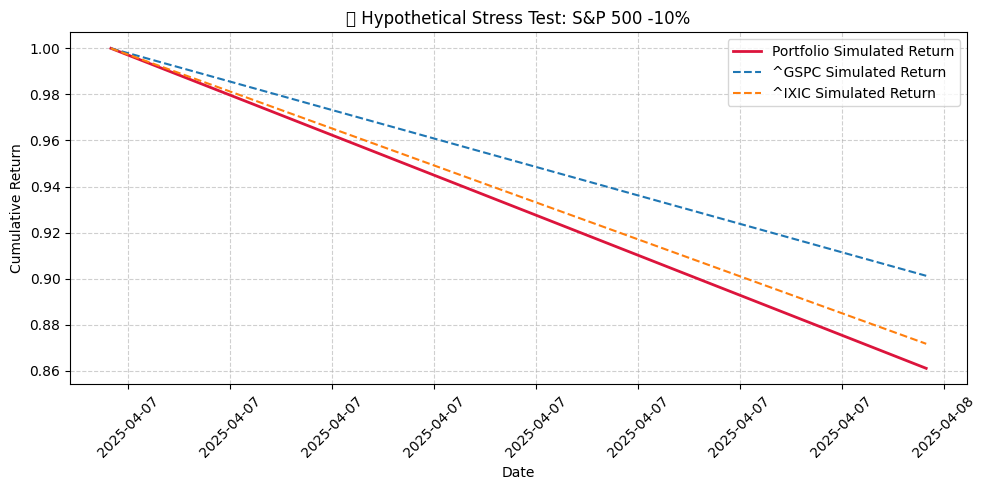


📊 Hypothetical Stress Test Summary
Scenario                       : S&P 500 -10%
Portfolio Return (%)           : -13.89
Tickers Used                   : AMD, META, VUAA.MI, VUSA.L, ELF, NKE, SOFI, HNST, NVDA
^GSPC Simulated Return (%)     : -9.88
^GSPC Tracking Error           : 0.1023
^IXIC Simulated Return (%)     : -12.83
^IXIC Tracking Error           : 0.0985


In [23]:
summary_negative = hypothetical_stress_test_sp500_shock(
    tickers,
    weights,
    shock_pct=-0.10,
    label="S&P 500 -10%",
    benchmark_tickers=["^GSPC", "^IXIC"]
)


In [26]:
def hypothetical_stress_test_rate_shock(tickers, weights, rate_change_pct=0.01, label="Interest Rate +1% Shock", benchmark_tickers=None):
    import yfinance as yf
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # 1. Fetch 1 year of daily returns for tickers and S&P 500 as rate proxy
    returns = yf.download(tickers + ['^GSPC'], period='1y', interval='1d')['Close'].dropna().pct_change().dropna()
    betas = {}

    for ticker in tickers:
        if ticker in returns.columns:
            cov = np.cov(returns[ticker], returns['^GSPC'])[0, 1]
            var = np.var(returns['^GSPC'])
            betas[ticker] = cov / var if var != 0 else 0

    # 2. Simulate portfolio return based on rate_change_pct * beta
    portfolio_return = sum(weights[i] * (rate_change_pct * -betas.get(ticker, 0)) for i, ticker in enumerate(tickers))
    portfolio_cumulative = pd.Series([1.0, 1.0 + portfolio_return], index=pd.date_range(end=pd.Timestamp.today(), periods=2))

    # 3. Benchmark assumptions (fixed impact)
    benchmark_returns_dict = {}
    benchmark_cumulative_dict = {}
    if benchmark_tickers:
        for bmark in benchmark_tickers:
            bmark_impact = rate_change_pct * -0.5  # assume S&P drops 0.5% per +1% hike
            sim_series = pd.Series([0.0, bmark_impact], index=portfolio_cumulative.index)
            cum_series = pd.Series([1.0, 1.0 + bmark_impact], index=portfolio_cumulative.index)
            benchmark_returns_dict[bmark] = sim_series
            benchmark_cumulative_dict[bmark] = cum_series

    # 4. Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(portfolio_cumulative, label='Portfolio Simulated Return', color='crimson', linewidth=2)

    for bmark, cum in benchmark_cumulative_dict.items():
        ax.plot(cum, label=f'{bmark} Simulated Return', linestyle='--')

    ax.set_title(f"📉 Hypothetical Stress Test: {label}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Return")
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 5. Summary
    summary = {
        "Scenario": label,
        "Tickers Used": tickers,
        "Portfolio Simulated Return (%)": round(portfolio_return * 100, 2)
    }

    for bmark, bmark_ret in benchmark_returns_dict.items():
        summary[f"{bmark} Simulated Return (%)"] = round((benchmark_cumulative_dict[bmark].iloc[-1] - 1) * 100, 2)
        tracking_error = np.sqrt(np.mean((bmark_ret - portfolio_return) ** 2))
        summary[f"{bmark} Tracking Error"] = round(tracking_error, 4)

    print("\n📊 Hypothetical Stress Test Summary:")
    print(f"Scenario                  : {summary['Scenario']}")
    print(f"Portfolio Return (%)      : {summary['Portfolio Simulated Return (%)']}%")
    print(f"Tickers Used              : {', '.join(summary['Tickers Used'])}")
    for key in summary:
        if key not in ['Scenario', 'Portfolio Simulated Return (%)', 'Tickers Used']:
            print(f"{key:30}: {summary[key]}")

    return summary


[*********************100%***********************]  10 of 10 completed


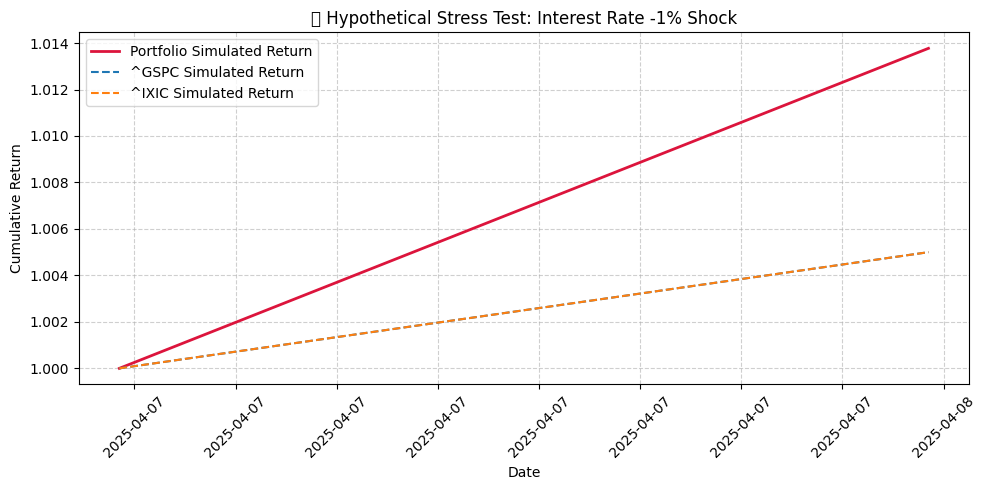


📊 Hypothetical Stress Test Summary:
Scenario                  : Interest Rate -1% Shock
Portfolio Return (%)      : 1.38%
Tickers Used              : AMD, META, VUAA.MI, VUSA.L, ELF, NKE, SOFI, HNST, NVDA
^GSPC Simulated Return (%)    : 0.5
^GSPC Tracking Error          : 0.0115
^IXIC Simulated Return (%)    : 0.5
^IXIC Tracking Error          : 0.0115


In [27]:
summary = hypothetical_stress_test_rate_shock(
    tickers=tickers,
    weights=weights,
    rate_change_pct=-0.01,  # For a -1% rate shock
    label="Interest Rate -1% Shock",
    benchmark_tickers=["^GSPC", "^IXIC"]
)


In [42]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pprint
import warnings
import logging

warnings.filterwarnings("ignore")
logging.getLogger("yfinance").setLevel(logging.CRITICAL)

def hypothetical_stress_test_rate_shock(tickers, weights, shock_pct=1.0, label="Interest Rate Shock", benchmark_tickers=None):
    # Step 1: Download historical price data (1 year)
    data = yf.download(tickers, period='1y', interval='1d')['Close'].dropna(how='all', axis=1)
    valid_data = data.dropna(axis=1)
    available_tickers = valid_data.columns.tolist()

    if len(available_tickers) == 0:
        print("🚫 No tickers available for stress test.")
        return

    filtered_indices = [tickers.index(t) for t in available_tickers]
    filtered_weights = np.array(weights)[filtered_indices]
    filtered_weights /= filtered_weights.sum()

    # Step 2: Calculate log returns
    returns = np.log(valid_data / valid_data.shift(1)).dropna()

    # Step 3: Get interest rate proxy (10Y Treasury)
    treasury = yf.download('^TNX', period='1y', interval='1d')['Close'].dropna()
    treasury_returns = np.log(treasury / treasury.shift(1)).dropna()

    # Step 4: Align returns with treasury
    aligned_returns = returns.loc[returns.index.intersection(treasury_returns.index)]
    treasury_returns = treasury_returns.loc[aligned_returns.index]

    # Step 5: Calculate beta for each asset
    betas = []
    for ticker in aligned_returns.columns:
        asset_ret = aligned_returns[ticker]
        common_index = asset_ret.index.intersection(treasury_returns.index)
        asset_ret = asset_ret.loc[common_index]
        rate_ret = treasury_returns.loc[common_index]
        cov = np.cov(asset_ret, rate_ret)[0, 1]
        var = np.var(rate_ret)
        beta = cov / var if var != 0 else 0
        betas.append(beta)
        print(f"Beta for {ticker}: {beta:.4f}")  # 🔍 Print per-asset beta

    # Step 6: Simulate return impact
    simulated_returns = [beta * shock_pct for beta in betas]
    portfolio_return = np.dot(simulated_returns, filtered_weights)
    portfolio_cumulative = pd.Series([1.0, 1.0 + portfolio_return], index=pd.date_range(start=pd.Timestamp.today(), periods=2))

    # Step 7: Benchmarks
    benchmark_returns_dict = {}
    benchmark_cumulative_dict = {}
    if benchmark_tickers:
        for bmark in benchmark_tickers:
            try:
                benchmark_prices = yf.download(bmark, period='1y', interval='1d')['Close'].dropna()
                bmark_returns = np.log(benchmark_prices / benchmark_prices.shift(1)).dropna()
                aligned_bmark = bmark_returns.loc[treasury_returns.index.intersection(bmark_returns.index)]
                treasury_common = treasury_returns.loc[aligned_bmark.index]

                cov = np.cov(aligned_bmark, treasury_common)[0, 1]
                var = np.var(treasury_common)
                bmark_beta = cov / var if var != 0 else 0

                bmark_shock = bmark_beta * shock_pct
                bmark_sim = pd.Series([1.0, 1.0 + bmark_shock], index=portfolio_cumulative.index)

                benchmark_returns_dict[bmark] = pd.Series([0.0, bmark_shock], index=portfolio_cumulative.index)
                benchmark_cumulative_dict[bmark] = bmark_sim
            except Exception as e:
                print(f"⚠️ Benchmark {bmark} failed: {e}")

    # Step 8: Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(portfolio_cumulative, label='Portfolio Simulated Return', color='crimson', linewidth=2)

    for bmark, bmark_cum in benchmark_cumulative_dict.items():
        ax.plot(bmark_cum, label=f'{bmark} Simulated Return', linestyle='--')

    ax.set_title(f"📉 Hypothetical Stress Test: {label}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Return")
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Step 9: Summary
    summary = {
        "Scenario": label,
        "Tickers Used": available_tickers,
        "Portfolio Return (%)": round(portfolio_return * 100, 2)
    }

    for bmark, bmark_ret in benchmark_returns_dict.items():
        bmark_cum = benchmark_cumulative_dict[bmark]
        summary[f"{bmark} Simulated Return (%)"] = round((bmark_cum.iloc[-1] - 1) * 100, 2)
        tracking_error = np.sqrt(np.mean((bmark_ret - portfolio_return) ** 2))
        summary[f"{bmark} Tracking Error"] = round(tracking_error, 4)

    print("\n📊 Hypothetical Stress Test Summary:")
    pprint.pprint(summary)

    return summary

In [43]:
# Run the +1% interest rate shock
summary = hypothetical_stress_test_rate_shock(
    tickers=tickers,
    weights=weights,
    shock_pct=1.0,
    label="Interest Rate +1% Shock",
    benchmark_tickers=["^GSPC", "^IXIC"]
)


[*********************100%***********************]  9 of 9 completed

🚫 No tickers available for stress test.
